In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
#from yahoofinancials import YahooFinancials
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations
import requests
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pwd

In [50]:
df=df1
df.head()

,Date,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
0,2000-01-03,29.847,35.477,3.531,26.650,14.561,21.582,43.004,16.984,23.522,...,4.701,16.747,32.228,20.159,21.319,5.841,22.564,NaN,47.338,21.713
1,2000-01-04,28.661,34.134,3.233,26.610,14.372,21.582,40.577,17.041,24.900,...,4.445,16.122,31.596,19.890,20.446,5.766,21.834,NaN,45.566,20.907
2,2000-01-05,30.122,33.959,3.280,28.474,14.914,22.049,40.895,17.228,25.782,...,4.702,16.416,31.326,20.086,20.255,5.753,22.564,NaN,44.503,21.097
3,2000-01-06,31.877,33.959,2.996,28.553,15.459,22.903,39.782,17.210,24.900,...,4.678,16.973,32.438,20.122,20.998,5.964,22.449,NaN,45.127,20.527
4,2000-01-07,32.510,34.434,3.138,29.382,15.962,23.306,42.129,18.342,24.506,...,4.678,18.123,35.024,20.922,21.831,6.663,22.283,NaN,48.535,21.052


In [47]:
df.set_index(keys='Date',inplace=True)
df

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.650,14.561,21.582,43.004,16.984,23.522,NaN,...,4.701,16.747,32.228,20.159,21.319,5.841,22.564,NaN,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.610,14.372,21.582,40.577,17.041,24.900,NaN,...,4.445,16.122,31.596,19.890,20.446,5.766,21.834,NaN,45.566,20.907
2000-01-05,30.122,33.959,3.280,28.474,14.914,22.049,40.895,17.228,25.782,NaN,...,4.702,16.416,31.326,20.086,20.255,5.753,22.564,NaN,44.503,21.097
2000-01-06,31.877,33.959,2.996,28.553,15.459,22.903,39.782,17.210,24.900,NaN,...,4.678,16.973,32.438,20.122,20.998,5.964,22.449,NaN,45.127,20.527
2000-01-07,32.510,34.434,3.138,29.382,15.962,23.306,42.129,18.342,24.506,NaN,...,4.678,18.123,35.024,20.922,21.831,6.663,22.283,NaN,48.535,21.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,200.300,102.700,166.440,385.620,133.160,114.650,47.290,48.130,111.520,53.81,...,81.880,42.450,96.470,125.540,118.070,270.200,55.060,135.01,95.830,72.260
2019-02-01,199.160,103.060,166.520,387.430,130.910,118.370,47.340,48.700,111.300,53.47,...,81.510,42.880,97.470,126.490,118.980,268.720,54.550,140.15,93.860,71.880
2019-02-04,200.210,103.420,171.250,397.000,130.880,119.740,47.350,49.250,111.800,53.13,...,81.990,42.440,98.030,126.040,119.140,268.210,54.040,141.50,94.770,71.460


## EDA

In [5]:
df.dtypes

MMM     float64
AXP     float64
AAPL    float64
BA      float64
CAT     float64
CVX     float64
CSCO    float64
KO      float64
DIS     float64
DWDP    float64
XOM     float64
GS      float64
HD      float64
IBM     float64
INTC    float64
JNJ     float64
JPM     float64
MCD     float64
MRK     float64
MSFT    float64
NKE     float64
PFE     float64
PG      float64
TRV     float64
UTX     float64
UNH     float64
VZ      float64
V       float64
WMT     float64
WBA     float64
dtype: object

In [6]:
pd.set_option('precision',3)
df.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,363.000,...,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,2741.000,4804.000,4804.000
mean,86.769,49.659,49.107,85.482,56.697,61.735,21.653,24.984,46.368,64.897,...,23.724,20.737,49.960,55.961,62.209,64.418,27.193,53.323,50.767,41.697
std,53.942,22.564,55.020,79.085,34.663,31.714,10.074,10.611,32.733,5.768,...,20.988,7.630,19.769,34.644,32.627,62.920,11.973,37.647,17.040,19.937
min,25.140,8.713,0.828,17.463,9.247,17.566,6.842,11.699,11.018,49.090,...,2.595,8.041,16.204,13.287,14.521,5.175,11.210,9.846,30.748,17.317
25%,51.192,34.079,3.900,37.407,26.335,31.820,14.910,15.420,22.044,62.250,...,8.037,15.031,35.414,29.907,34.328,23.498,17.434,18.959,38.062,27.704
50%,63.514,42.274,23.316,58.437,53.048,56.942,18.578,20.563,29.521,66.586,...,14.147,18.643,46.735,39.824,55.715,42.924,21.556,45.207,42.782,32.706
75%,122.906,66.816,84.007,112.996,76.488,91.688,24.650,34.927,75.833,69.143,...,36.545,25.403,68.135,80.767,92.557,73.171,38.996,76.966,65.076,58.165
max,251.981,112.421,231.260,411.110,166.832,128.680,63.698,50.400,117.973,75.261,...,85.300,45.841,98.030,146.564,141.280,286.330,60.016,150.525,107.010,90.188


<AxesSubplot:>

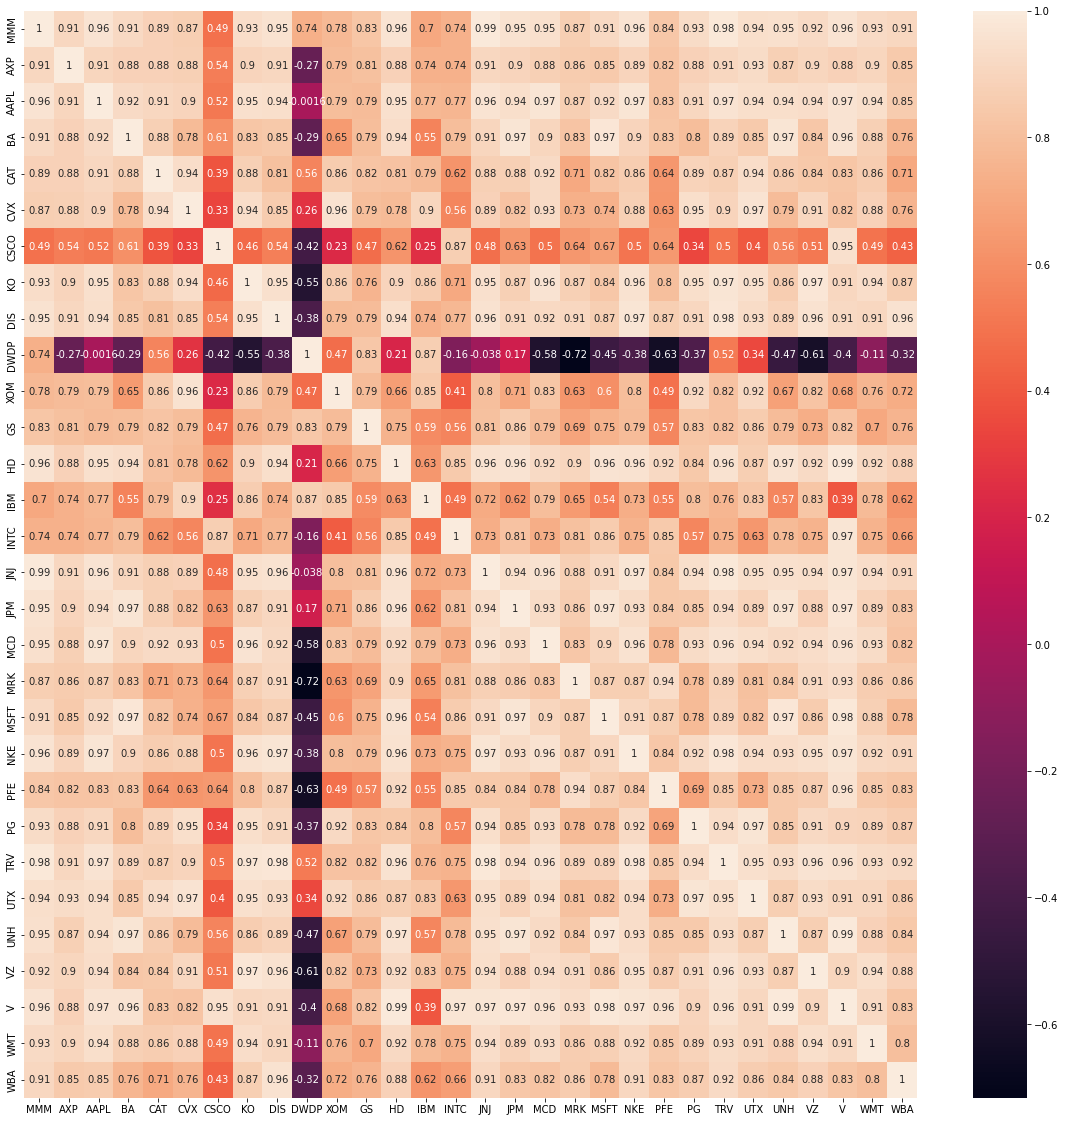

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method='pearson'),annot=True)

In [8]:
df.isnull().sum()

MMM        0
AXP        0
AAPL       0
BA         0
CAT        0
CVX        0
CSCO       0
KO         0
DIS        0
DWDP    4441
XOM        0
GS         0
HD         0
IBM        0
INTC       0
JNJ        0
JPM        0
MCD        0
MRK        0
MSFT       0
NKE        0
PFE        0
PG         0
TRV        0
UTX        0
UNH        0
VZ         0
V       2063
WMT        0
WBA        0
dtype: int64

In [9]:
df.fillna('bfill',inplace=True)

In [10]:
df.isnull().sum()

MMM     0
AXP     0
AAPL    0
BA      0
CAT     0
CVX     0
CSCO    0
KO      0
DIS     0
XOM     0
GS      0
HD      0
IBM     0
INTC    0
JNJ     0
JPM     0
MCD     0
MRK     0
MSFT    0
NKE     0
PFE     0
PG      0
TRV     0
UTX     0
UNH     0
VZ      0
WMT     0
WBA     0
dtype: int64

In [11]:
# Daily Log Returns (%)
df_lag=df.shift(1).copy()
df_lag.fillna(method='bfill',inplace=True)
data_log_returns = np.log(df / df.shift(1))
# Daily Linear Returns (%)
data_returns = df.pct_change(1)

#Removing Outliers beyong 3 standard deviation
data_returns= data_returns[data_returns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data_returns)
rescaled_data = pd.DataFrame(scaler.fit_transform(data_returns),columns = data_returns.columns, index = data_returns.index)

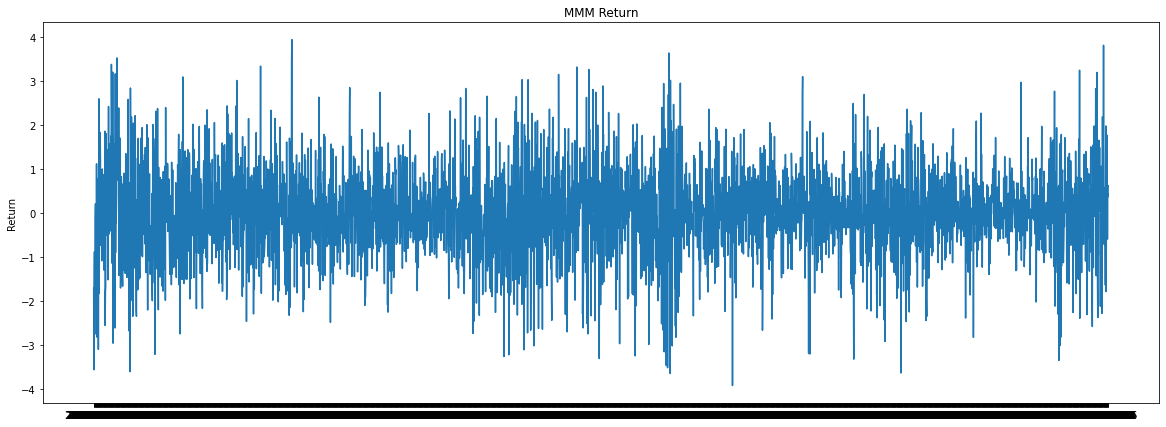

In [13]:
plt.figure(figsize=(20, 7))
'''
plt.figure(figsize=(30,20))
i=1
for c in rescaled_data.columns:
    plt.subplot(2,14,i)
    i+=1
    plt.plot(rescaled_data[c])
'''
plt.plot(rescaled_data['MMM'])
plt.title("MMM Return")
plt.ylabel("Return")
#plt.grid(True)
plt.show()

In [14]:
X_train= rescaled_data[:int(len(rescaled_data) * 0.8)]
X_test= rescaled_data[int(len(rescaled_data) * 0.8):]
X_train_raw= data_returns[:int(len(rescaled_data) * 0.8)]
X_test_raw= data_returns[int(len(rescaled_data) * 0.8):]
#Use train_test_split instead with suffling off.
stock_tickers = rescaled_data.columns.values
n_tickers=len(stock_tickers)

In [15]:
stock_tickers

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'WBA'], dtype=object)

In [16]:
from sklearn.decomposition import PCA
pca=PCA()


In [17]:
pca.fit_transform(X_train)

array([[ 2.86576606e-01, -2.89127995e+00,  1.73216267e+00, ...,
         2.02763565e+00, -1.59206651e+00,  1.04356957e+00],
       [ 4.02578959e+00, -1.76941322e-01,  1.73200563e+00, ...,
        -3.91757413e-01,  5.36277071e-01, -1.07920858e+00],
       [ 2.85182542e+00,  5.36107938e-01, -1.62313742e+00, ...,
         1.06098093e+00,  1.30154032e-01,  1.08598908e+00],
       ...,
       [-1.32507422e+00, -6.62929335e-01,  8.85064892e-01, ...,
         5.54361411e-01,  2.13178430e-01,  1.48361114e+00],
       [ 1.35739171e+00, -2.25868036e-04, -8.29142856e-01, ...,
         4.75292801e-02,  3.49210308e-01, -7.88586888e-01],
       [ 4.06722550e+00,  2.53600232e-01,  1.53929733e+00, ...,
         1.53838161e-01, -1.41283792e-01,  4.78970991e-01]])

In [18]:
pca.components_[0]

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

In [19]:
pca.explained_variance_ratio_

array([0.37034695, 0.05713222, 0.04354582, 0.03974725, 0.03521035,
       0.03145037, 0.02905596, 0.02786764, 0.02748715, 0.0252315 ,
       0.0245068 , 0.0238662 , 0.02240071, 0.02112769, 0.02027904,
       0.02020582, 0.01934608, 0.01912025, 0.01808923, 0.01773868,
       0.01678349, 0.01562775, 0.015296  , 0.01448167, 0.0141177 ,
       0.01237055, 0.01080727, 0.00675988])

,Explained Variance in %
0,37.035
1,42.748
2,47.102
3,51.077
4,54.598
5,57.743
6,60.649
7,63.436
8,66.184
9,68.708


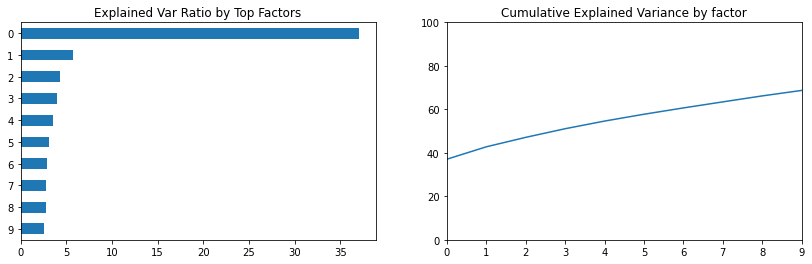

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
series1=pd.Series(pca.explained_variance_ratio_[:10]).sort_values()*100
series2=pd.Series(pca.explained_variance_ratio_[:10]).cumsum()*100

Cumm_Var=pd.DataFrame()
Cumm_Var['Explained Variance in %']=pd.DataFrame(series2)

series1.plot.barh(title='Explained Var Ratio by Top Factors',ax=axes[0])
series2.plot(ylim=(0,100),xlim=(0,9),title='Cumulative Explained Variance by factor',ax=axes[1])

Cumm_Var

In [21]:
Cumm_Var=pd.DataFrame()
Cumm_Var['Explained Variance']=pd.DataFrame(series2)

In [22]:
def PCWeights():
    weights= pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights['weights_{}'.format(i)]=pca.components_[i]/sum(pca.components_[i])
    weights = weights.values.T
    return weights
        
weights=PCWeights()

In [23]:
weights

array([[ 4.34128661e-02,  4.35148637e-02,  2.91604183e-02,
         3.61482976e-02,  3.84922834e-02,  3.39390408e-02,
         3.71738454e-02,  3.20996926e-02,  3.96745487e-02,
         3.67935478e-02,  3.97869035e-02,  3.85527963e-02,
         3.79961258e-02,  3.71992000e-02,  3.17979896e-02,
         4.34581888e-02,  2.88756883e-02,  3.23832337e-02,
         3.69054308e-02,  3.26209355e-02,  3.61929133e-02,
         3.20247383e-02,  3.76561008e-02,  4.31780118e-02,
         2.63371983e-02,  3.18014728e-02,  3.21997954e-02,
         3.06238726e-02],
       [ 8.32979380e-02, -3.15064408e-01, -1.14948299e+00,
        -4.29490046e-02, -2.92012898e-01,  4.43031492e-01,
        -1.23476536e+00,  8.49493580e-01, -3.13272597e-01,
         5.17988624e-01, -5.66281372e-01, -4.03852584e-02,
        -6.22330526e-01, -1.14499381e+00,  1.19818527e+00,
        -4.39654452e-01,  3.72380098e-01,  1.04736708e+00,
        -7.24624700e-01, -8.28187396e-03,  7.98139106e-01,
         1.02945531e+00,  1.61

In [24]:
pca.components_[0]

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

array([[<AxesSubplot:title={'center':'Portfolio 0'}>],
       [<AxesSubplot:title={'center':'Portfolio 1'}>],
       [<AxesSubplot:title={'center':'Portfolio 2'}>],
       [<AxesSubplot:title={'center':'Portfolio 3'}>],
       [<AxesSubplot:title={'center':'Portfolio 4'}>]], dtype=object)

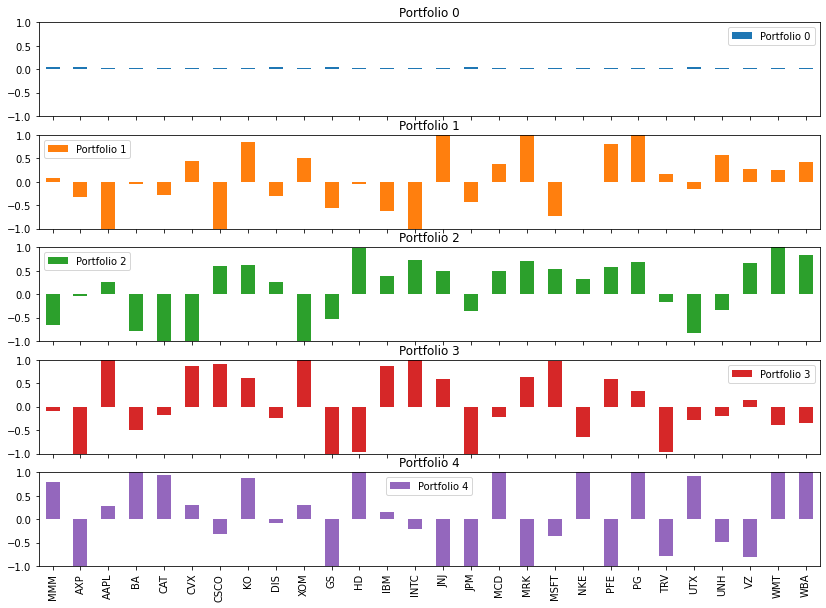

In [25]:
top_Comp=5
        
topPortfolios = pd.DataFrame(pca.components_[:top_Comp], columns=df.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = ['Portfolio {}'.format(i) for i in range(top_Comp)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(top_Comp),1), figsize=(14,10), ylim= (-1,1))

<AxesSubplot:>

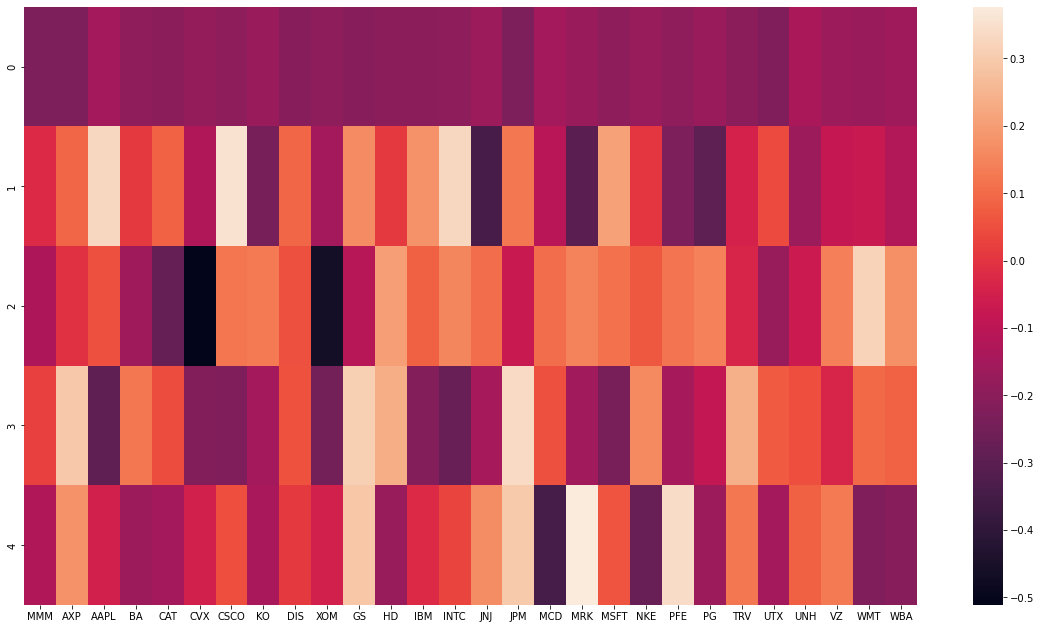

In [26]:
plt.figure(figsize=(20,11))
sns.heatmap(topPortfolios)

## Finding the best Eigen Portfolio

In [27]:
def Sharpe_Ratio(port_returns, periods_per_yr=252):
    
    n_periods= periods_per_yr/port_returns.shape[0]
    annualized_return= np.power(np.prod(1+ port_returns),(n_periods))-1
    annualized_vol= port_returns.std()*np.sqrt(periods_per_yr)
    annualized_sharpe= annualized_return/annualized_vol
    
    return annualized_return, annualized_vol, annualized_sharpe

In [28]:
stock_tickers      #Declared  and Defined Above
n_tickers          #Declared and Defined Above
#components= pca.components_
#results=pd.DataFrame()
#Eigen_port=pd.DataFrame()
#n_portfolios= len(pca.components_)
#annualized_ret = np.array([0.] * n_portfolios)
#sharpe_metric = np.array([0.] * n_portfolios)
#annualized_vol = np.array([0.] * n_portfolios)

def OptimisedPortfolio():
    n_portfolios= len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    
    components= pca.components_
    
    max_sharpe=0
    results=pd.DataFrame()
    
    for i in range(n_portfolios):
        
        compo_weights= components[i]/sum(components[i])
        Eigen_port= pd.DataFrame(data ={'weightage': compo_weights*100}, index = stock_tickers)
        Eigen_port.sort_values(by=['weightage'],ascending=False,inplace =True)
        Eigen_port_returns = np.dot(X_train_raw.loc[:, Eigen_port.index], compo_weights)
        
        ar,vol,sharpe= Sharpe_Ratio(Eigen_port_returns)
        annualized_ret[i] = ar
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    
    max_sharpe_index= np.argmax(sharpe_metric)
    print('Eigen portfolio with index %d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
         (max_sharpe_index,annualized_ret[max_sharpe_index]*100, 
         annualized_vol[max_sharpe_index]*100, sharpe_metric[max_sharpe_index]))    
    
    
    results=pd.DataFrame(data={'Return':annualized_ret,'Volatility':annualized_vol,'Sharpe Ratio': sharpe_metric})
    sharpe_values= results['Sharpe Ratio'].copy()
    results.sort_values(by=['Sharpe Ratio'], ascending=False, inplace=True)
    results.dropna(inplace=True)
    #print(results)
    return results, sharpe_values

In [29]:
results, Sharpe_Values =OptimisedPortfolio()
results

Eigen portfolio with index 0 with the highest Sharpe. Return 11.47%, vol = 13.31%, Sharpe = 0.86


,Return,Volatility,Sharpe Ratio
0,0.115,0.133,0.862
7,0.096,0.693,0.138
5,0.100,0.845,0.118
1,0.057,0.670,0.084
2,-0.107,0.859,-0.124
11,-1.000,7.227,-0.138
13,-0.399,2.070,-0.193
25,-1.000,5.008,-0.200
23,-1.000,4.954,-0.202
6,-0.416,1.967,-0.212


In [30]:
def compo_sharpe_graph(Sharpe_Values):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 4)
    ax.plot(Sharpe_Values, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

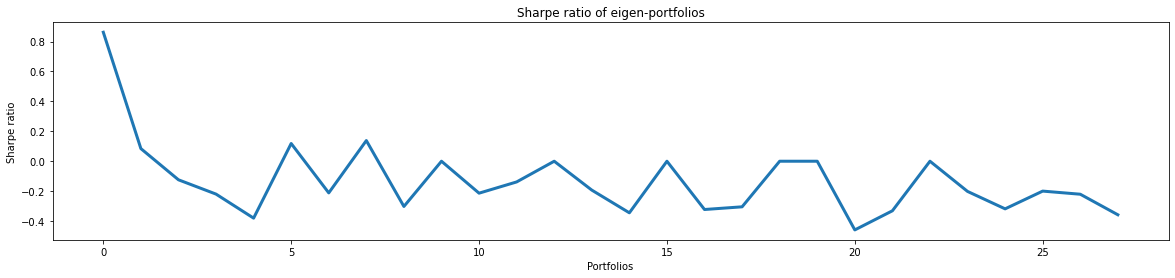

In [31]:
compo_sharpe_graph(Sharpe_Values)

Sum of weights of current eigen-portfolio: weights    100.0
dtype: float64


,weights
AXP,4.351
JPM,4.346
MMM,4.341
UTX,4.318
GS,3.979
DIS,3.967
HD,3.855
CAT,3.849
IBM,3.800
TRV,3.766


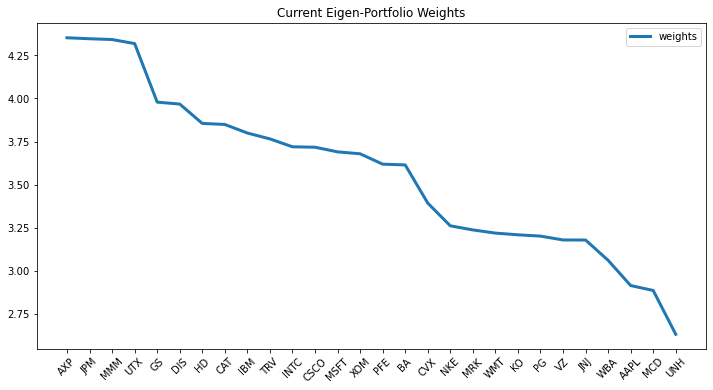

In [32]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of current eigen-portfolio: {}'.format(np.sum(portfolio)))
    portfolio.plot(title='Current Eigen-Portfolio Weights', figsize=(12,6), xticks=range(0, len(stock_tickers),1), rot=45,  linewidth=3)
    
    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0])

## Backtesting

In [36]:
def Backtest(eigen):
    best_sharpe=0
    best_return=0
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
    
    eigen_portfolio_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    returns, vol, sharpe = Sharpe_Ratio(eigen_portfolio_returns)
    
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    
    
    
    

In [39]:
#equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)  
#X_test_raw.sum(axis=1)
#np.cumprod(tt+1)

Equal Weighted-Portfolio:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05

Current Eigen-Portfolio with highest Sharpe Ratio:
Return = 23.20%
Volatility = 11.27%
Sharpe = 2.06


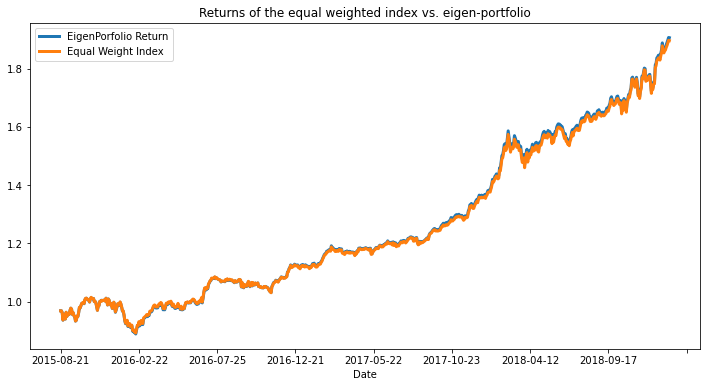

Equal Weighted-Portfolio:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05

Current Eigen-Portfolio with highest Return:
Return = 99.80%
Volatility = 58.34%
Sharpe = 1.71


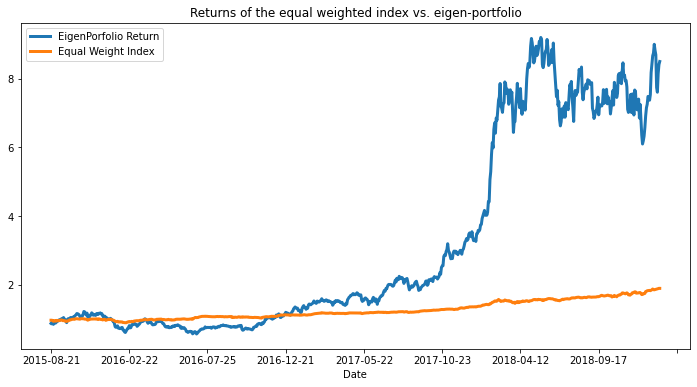

In [38]:
def Backtest(eigen):
    
    Sharpe_Store=[]
    Return_Store=[]
    
    for i in range(0,len(pca.components_)):
        
        eigen_portfolio = pd.DataFrame(data ={'weights': eigen[i]}, index = stock_tickers)
        eigen_portfolio.sort_values(by=['weights'], ascending=False, inplace=True)    

        eigen_portfolio_returns = np.dot(X_test_raw.loc[:, eigen_portfolio.index], eigen[i])
        eigen_portfolio_returns = pd.Series(eigen_portfolio_returns, index=X_test_raw.index)
        
        returns, vol, sharpe = Sharpe_Ratio(eigen_portfolio_returns)
        Sharpe_Store.append((sharpe,i))
        Return_Store.append((returns,i))
        #print(i)
    max_sharpe_ind= max(Sharpe_Store)[1]
    max_return_ind= max(Return_Store)[1]
    #print(max_sharpe_ind)
    #print(max_return_ind)
        
        
    #Equal Weighted Index
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)     #Total Daily Return.
    returns_eq, vol_eq, sharpe_eq = Sharpe_Ratio(equal_weight_return)
    
    #Best Sharpe Ratio Portfolio
    best_sharpe_portfolio = pd.DataFrame(data ={'weights': eigen[max_sharpe_ind].squeeze()}, index = stock_tickers)
    best_sharpe_portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    
    best_sharpe_portfolio = np.dot(X_test_raw.loc[:, best_sharpe_portfolio.index], eigen[max_sharpe_ind])
    best_sharpe_portfolio = pd.Series(best_sharpe_portfolio, index=X_test_raw.index)
    returns_s, vol_s, sharpe_s = Sharpe_Ratio(best_sharpe_portfolio)
    
    #Best Return Portfolio
    best_return_portfolio = pd.DataFrame(data ={'weights': eigen[max_return_ind]}, index = stock_tickers)
    best_return_portfolio.sort_values(by=['weights'], ascending=False, inplace=True) 
    
    best_return_portfolio = np.dot(X_test_raw.loc[:, best_return_portfolio.index], eigen[max_return_ind])
    best_return_portfolio = pd.Series(best_return_portfolio, index=X_test_raw.index)
    returns_r, vol_r, sharpe_r = Sharpe_Ratio(best_return_portfolio)

    #eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    #eigen_portfolio_returns = pd.Series(eigen_prti_returns, index=X_test_raw.index)
    #returns, vol, sharpe = Sharpe_Ratio(eigen_portfolio_returns)
    
    print('Equal Weighted-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f\n\nCurrent Eigen-Portfolio with highest Sharpe Ratio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns_eq*100,vol_eq*100,sharpe_eq,returns_s*100, vol_s*100, sharpe_s))
    df_plot = pd.DataFrame({'EigenPorfolio Return': best_sharpe_portfolio, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot+1).plot(title='Returns of the equal weighted index vs. eigen-portfolio',figsize=(12,6), linewidth=3)
    plt.show()
    
    print('Equal Weighted-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f\n\nCurrent Eigen-Portfolio with highest Return:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns_eq*100,vol_eq*100,sharpe_eq,returns_r*100, vol_r*100, sharpe_r))
    df_plot = pd.DataFrame({'EigenPorfolio Return': best_return_portfolio, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot+1).plot(title='Returns of the equal weighted index vs. eigen-portfolio',figsize=(12,6), linewidth=3)
    plt.show()

Backtest(weights)